# Import the dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

# Data collection

In [2]:
data = pd.read_csv("C:/Users/Windows/Downloads/framingham.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
data.shape

(4238, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Checking for missing values

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Analysing distribution of data

C:\Users\Windows\AppData\Local\Temp\ipykernel_12368\384461374.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.education)


<Axes: xlabel='education', ylabel='Density'>

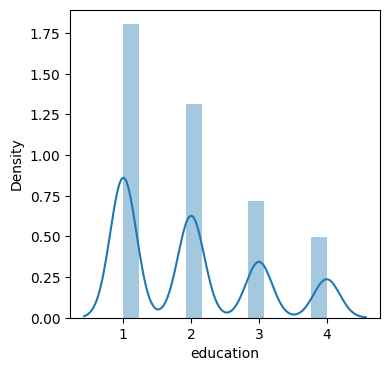

In [8]:
#analyse the distribution of data in education column
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(data.education)

C:\Users\Windows\AppData\Local\Temp\ipykernel_12368\3018981942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.cigsPerDay)


<Axes: xlabel='cigsPerDay', ylabel='Density'>

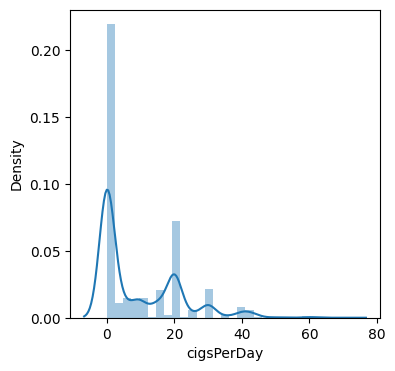

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(data.cigsPerDay)

C:\Users\Windows\AppData\Local\Temp\ipykernel_12368\1388849466.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BPMeds)


<Axes: xlabel='BPMeds', ylabel='Density'>

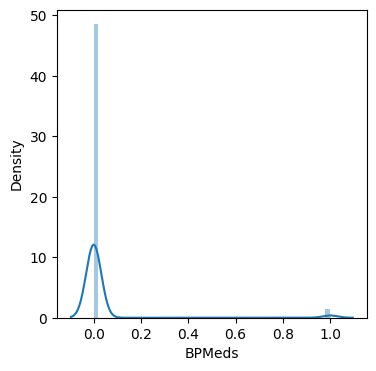

In [10]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(data.BPMeds)

C:\Users\Windows\AppData\Local\Temp\ipykernel_12368\3181809494.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.totChol)


<Axes: xlabel='totChol', ylabel='Density'>

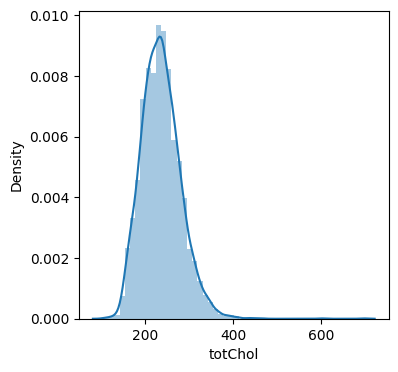

In [11]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(data.totChol)

C:\Users\Windows\AppData\Local\Temp\ipykernel_12368\685820061.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

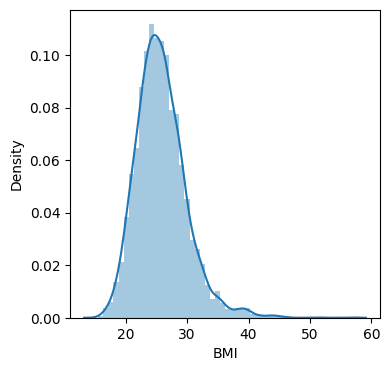

In [12]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(data.BMI)

C:\Users\Windows\AppData\Local\Temp\ipykernel_12368\3385559648.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.heartRate)


<Axes: xlabel='heartRate', ylabel='Density'>

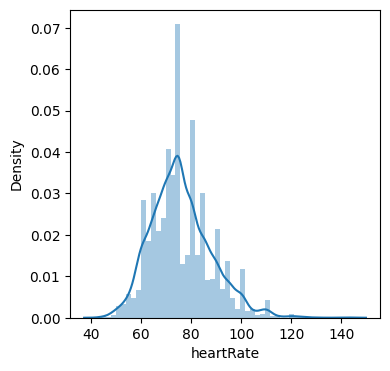

In [13]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(data.heartRate)

C:\Users\Windows\AppData\Local\Temp\ipykernel_12368\3429115935.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.glucose)


<Axes: xlabel='glucose', ylabel='Density'>

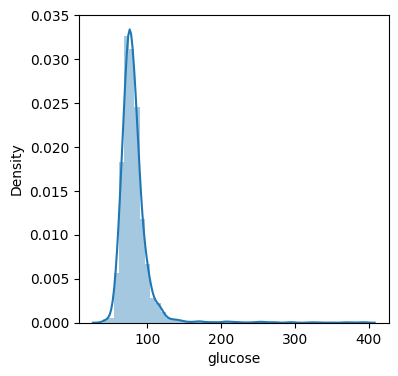

In [14]:
fig, ax = plt.subplots(figsize=(4,4))
sns.distplot(data.glucose)

# Imputing missing values

In [15]:
data['education'].fillna(data['education'].median(),inplace=True)

In [16]:
data['cigsPerDay'].fillna(data['cigsPerDay'].median(),inplace=True)

In [17]:
data['BPMeds'].fillna(data['BPMeds'].median(),inplace=True)

In [18]:
data['totChol'].fillna(data['totChol'].median(),inplace=True)

In [19]:
data['BMI'].fillna(data['BMI'].median(),inplace=True)

In [20]:
data['heartRate'].fillna(data['heartRate'].median(),inplace=True)

In [21]:
data['glucose'].fillna(data['glucose'].median(),inplace=True)

In [22]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Handling duplicate values

In [23]:
data_dup = data.duplicated().any()
data_dup

False

# Data processing

In [24]:
cate_val = []
cont_val = []

for col in data.columns:
    if data[col].nunique() <= 10:
        cate_val.append(col)
    else:
        cont_val.append(col)

In [25]:
cate_val

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [26]:
cont_val

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

# Encoding categorical data

In [27]:
cate_val

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [28]:
cate_val.remove('male')
cate_val.remove('diabetes')
cate_val.remove('currentSmoker')
cate_val.remove('BPMeds')
cate_val.remove('prevalentStroke')
cate_val.remove('prevalentHyp')
cate_val.remove('TenYearCHD')

In [29]:
cate_val

['education']

In [30]:
data = pd.get_dummies(data,columns=cate_val,drop_first=False)

In [31]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0


# Checking the distribution of target variable

In [32]:
data['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [35]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,-1.234951,0,-0.751322,0.0,0,0,0,-0.940600,-1.195907,-1.082625,0.287379,0.342761,-0.201359,0,0,0,0,1
1,0,-0.418257,0,-0.751322,0.0,0,0,0,0.300313,-0.515187,-0.158988,0.719752,1.590291,-0.245099,0,0,1,0,0
2,1,-0.184916,1,0.929210,0.0,0,0,0,0.187503,-0.220209,-0.242955,-0.113057,-0.073082,-0.507537,0,1,0,0,0
3,0,1.331800,1,1.769476,0.0,0,1,0,-0.263739,0.800871,1.016549,0.682902,-0.904768,0.935872,1,0,0,1,0
4,0,-0.418257,1,1.181289,0.0,0,0,0,1.089985,-0.106755,0.092912,-0.663350,0.758605,0.148558,0,0,0,1,0


# Split into training and testing dataset

In [36]:
X = data.drop('TenYearCHD',axis=1)

In [37]:
Y = data['TenYearCHD']

In [38]:
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
0,1,-1.234951,0,-0.751322,0.0,0,0,0,-0.940600,-1.195907,-1.082625,0.287379,0.342761,-0.201359,0,0,0,1
1,0,-0.418257,0,-0.751322,0.0,0,0,0,0.300313,-0.515187,-0.158988,0.719752,1.590291,-0.245099,0,1,0,0
2,1,-0.184916,1,0.929210,0.0,0,0,0,0.187503,-0.220209,-0.242955,-0.113057,-0.073082,-0.507537,1,0,0,0
3,0,1.331800,1,1.769476,0.0,0,1,0,-0.263739,0.800871,1.016549,0.682902,-0.904768,0.935872,0,0,1,0
4,0,-0.418257,1,1.181289,0.0,0,0,0,1.089985,-0.106755,0.092912,-0.663350,0.758605,0.148558,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,0.048425,1,-0.667296,0.0,0,1,0,1.721723,2.116930,0.764648,0.041713,-0.821599,0.192298,1,0,0,0
4234,1,0.165095,1,2.861821,0.0,0,0,0,-0.669856,-0.265590,-0.242955,-1.496159,-0.904768,-0.595016,0,0,1,0
4235,0,-0.184916,1,0.929210,0.0,0,0,0,0.255189,-0.061374,-0.914691,-0.933583,0.675436,0.192298,0,1,0,0
4236,0,-0.651598,1,0.509077,0.0,0,0,0,-0.602170,-0.265590,0.344813,-1.631275,0.841773,-0.157620,1,0,0,0


In [39]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [44]:
ypred1=log.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
#accuracy 
accuracy_score(Y_test,ypred1)

0.8455188679245284

In [47]:
#precision
precision_score(Y_test,ypred1)

0.4444444444444444

In [48]:
#recall 
recall_score(Y_test,ypred1)

0.06201550387596899

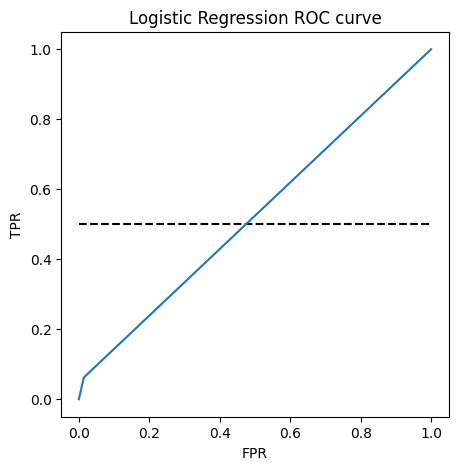

In [49]:
fpr, tpr, thresholds=roc_curve(Y_test, ypred1)

plt.figure(figsize = (5,5))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(fpr, tpr, label = 'LR')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression ROC curve')
plt.show()

In [50]:
f1_score(Y_test,ypred1)

0.10884353741496598

# SVC

In [51]:
from sklearn import svm

In [52]:
svm=svm.SVC()

In [53]:
svm.fit(X_train,Y_train)

SVC()

In [54]:
ypred2=svm.predict(X_test)

In [55]:
#accuracy
accuracy_score(Y_test,ypred2)

0.8514150943396226

In [56]:
#precision
precision_score(Y_test,ypred2)

0.8

In [57]:
#recall 
recall_score(Y_test,ypred2)

0.031007751937984496

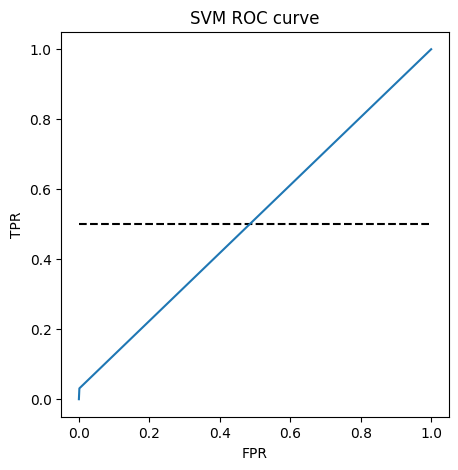

In [58]:
fpr, tpr, thresholds=roc_curve(Y_test, ypred2)

plt.figure(figsize = (5,5))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(fpr, tpr, label = 'SVM')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('SVM ROC curve')
plt.show()

In [59]:
f1_score(Y_test,ypred2)

0.059701492537313425

# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
X = data.drop('TenYearCHD',axis=1)
Y = data['TenYearCHD']

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [63]:
rt=RandomForestClassifier()

In [64]:
rt.fit(X_train,Y_train)

RandomForestClassifier()

In [65]:
ypred3=rt.predict(X_test)

In [66]:
#acuracy
accuracy_score(Y_test,ypred3)

0.8408018867924528

In [67]:
#precision
precision_score(Y_test,ypred3)

0.2857142857142857

In [68]:
#recall 
recall_score(Y_test,ypred3)

0.031007751937984496

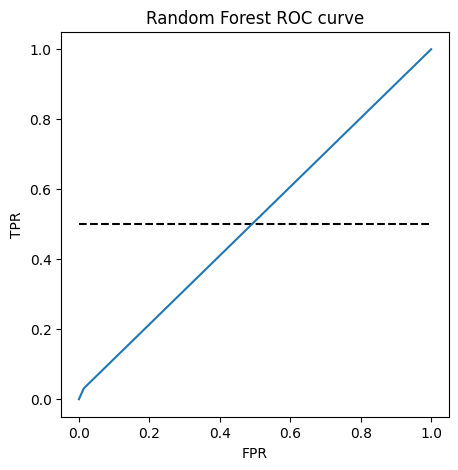

In [69]:
fpr, tpr, thresholds=roc_curve(Y_test, ypred3)

plt.figure(figsize = (5,5))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(fpr, tpr, label = 'RF')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Random Forest ROC curve')
plt.show()

In [70]:
f1_score(Y_test,ypred3)

0.055944055944055944

# Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc = GradientBoostingClassifier()

In [73]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [74]:
ypred4=gbc.predict(X_test)

In [75]:
#accuracy
accuracy_score(Y_test,ypred4)

0.8372641509433962

In [76]:
#precision
precision_score(Y_test,ypred4)

0.3333333333333333

In [77]:
#recall 
recall_score(Y_test,ypred4)

0.06976744186046512

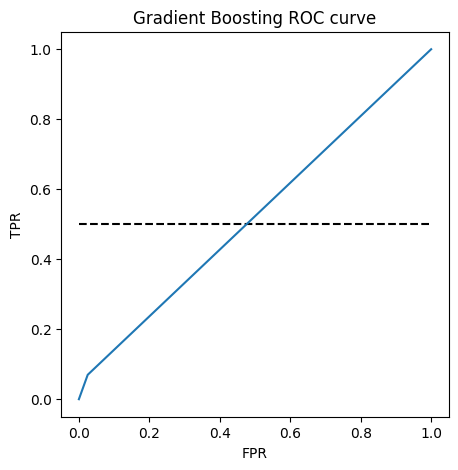

In [78]:
fpr, tpr, thresholds=roc_curve(Y_test, ypred4)

plt.figure(figsize = (5,5))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(fpr, tpr, label = 'GB')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Gradient Boosting ROC curve')
plt.show()

In [79]:
f1_score(Y_test,ypred4)

0.11538461538461539

# KNeighbours Classifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn=KNeighborsClassifier(n_neighbors=12)

In [82]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=12)

In [83]:
X_test.shape

(848, 18)

In [84]:
if not isinstance(X_test, np.ndarray):
    X_test = np.array(X_test)

# Check the shape of 'X_test'
if X_test.ndim == 1:
    # If 'X_test' is a 1D array, reshape it to a 2D array with one row
    X_test = X_test.reshape(1, -1)

In [85]:
ypred5=knn.predict(X_test)

C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [86]:
#accuracy
accuracy_score(Y_test,ypred5)

0.8514150943396226

In [87]:
#precision
precision_score(Y_test,ypred5)

0.7142857142857143

In [88]:
#recall 
recall_score(Y_test,ypred5)

0.03875968992248062

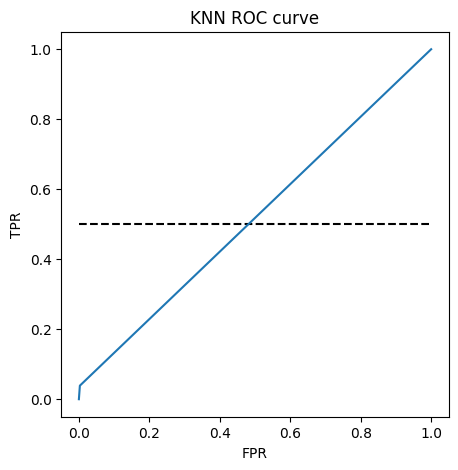

In [89]:
fpr, tpr, thresholds=roc_curve(Y_test, ypred5)

plt.figure(figsize = (5,5))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNN ROC curve')
plt.show()

In [90]:
f1_score(Y_test,ypred5)

0.07352941176470588

# Decision Tree Classifier

In [91]:
data = pd.read_csv("C:/Users/Windows/Downloads/framingham.csv")

In [92]:
data = data.drop_duplicates()

In [93]:
X = data.drop('TenYearCHD',axis=1)

In [94]:
Y = data['TenYearCHD']

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt=DecisionTreeClassifier()

In [98]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [99]:
ypred6=dt.predict(X_test)

In [100]:
#accuracy
accuracy_score(Y_test,ypred6)

0.8089622641509434

In [101]:
#precision
precision_score(Y_test,ypred6)

0.22033898305084745

In [102]:
#recall 
recall_score(Y_test,ypred6)

0.10077519379844961

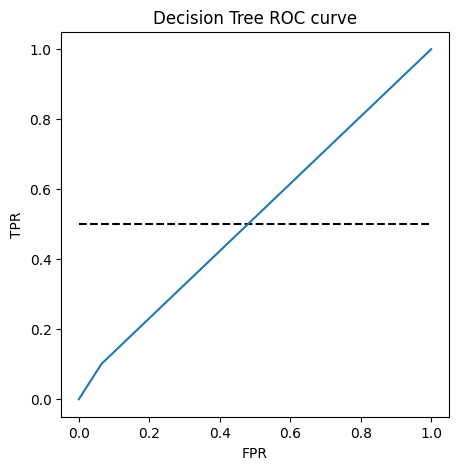

In [103]:
fpr, tpr, thresholds=roc_curve(Y_test, ypred6)

plt.figure(figsize = (5,5))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(fpr, tpr, label = 'DT')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Decision Tree ROC curve')
plt.show()

In [104]:
f1_score(Y_test,ypred6)

0.13829787234042554

In [105]:
final_data=pd.DataFrame({'Models':['LR','SVM','RF','GC','KNN','DT'],'Acc':[accuracy_score(Y_test,ypred1),accuracy_score(Y_test,ypred2),accuracy_score(Y_test,ypred3),accuracy_score(Y_test,ypred4),accuracy_score(Y_test,ypred5),accuracy_score(Y_test,ypred6)]})

In [106]:
final_data

,Models,Acc
0,LR,0.845519
1,SVM,0.851415
2,RF,0.840802
3,GC,0.837264
4,KNN,0.851415
5,DT,0.808962
